TFG 5

In [3]:
!pip install graphviz


V. Diagrama Organizacional

Organigrama guardado en: organigrama_tfg.png


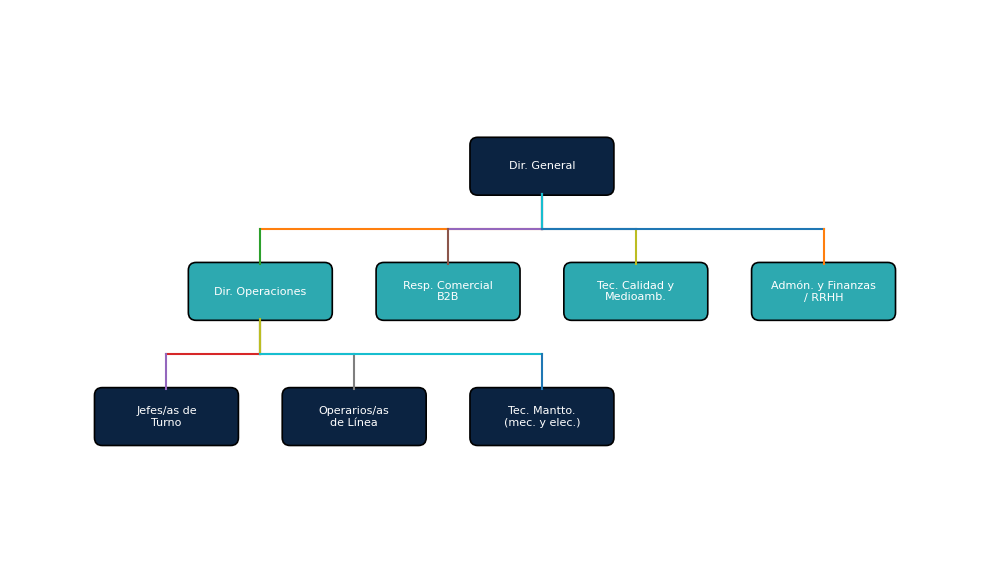

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def crear_organigrama_matplotlib(nombre_salida="organigrama_tfg.png"):
    # Definir puestos por nivel y posición horizontal (títulos abreviados)
    nodes = {
        "Dir. General": dict(level=0, pos=0),

        "Dir. Operaciones": dict(level=1, pos=-1.5),
        "Resp. Comercial\nB2B": dict(level=1, pos=-0.5),
        "Tec. Calidad y\nMedioamb.": dict(level=1, pos=0.5),
        "Admón. y Finanzas\n/ RRHH": dict(level=1, pos=1.5),

        "Jefes/as de\nTurno": dict(level=2, pos=-2.0),
        "Operarios/as\nde Línea": dict(level=2, pos=-1.0),
        "Tec. Mantto.\n(mec. y elec.)": dict(level=2, pos=0.0),
    }

    edges = [
        ("Dir. General", "Dir. Operaciones"),
        ("Dir. General", "Resp. Comercial\nB2B"),
        ("Dir. General", "Tec. Calidad y\nMedioamb."),
        ("Dir. General", "Admón. y Finanzas\n/ RRHH"),

        ("Dir. Operaciones", "Jefes/as de\nTurno"),
        ("Dir. Operaciones", "Operarios/as\nde Línea"),
        ("Dir. Operaciones", "Tec. Mantto.\n(mec. y elec.)"),
    ]

    fig, ax = plt.subplots(figsize=(10, 6))

    box_width = 1.8
    box_height = 0.7
    v_gap = 1.6  # separación vertical entre niveles

    # Pasar de nivel-pos a coordenadas x,y
    max_level = max(n["level"] for n in nodes.values())
    for name, data in nodes.items():
        level = data["level"]
        pos = data["pos"]
        x = pos * (box_width + 0.6)
        y = (max_level - level) * v_gap  # invertimos para que 0 esté arriba
        data["x"] = x
        data["y"] = y

    # Dibujar líneas (estilo organigrama: vertical + horizontal)
    for parent, child in edges:
        p = nodes[parent]
        c = nodes[child]
        x0 = p["x"]
        y0 = p["y"] - box_height / 2
        x1 = c["x"]
        y1 = c["y"] + box_height / 2
        mid_y = (y0 + y1) / 2

        ax.plot([x0, x0], [y0, mid_y])
        ax.plot([x0, x1], [mid_y, mid_y])
        ax.plot([x1, x1], [mid_y, y1])

    # Dibujar cajas
    for name, data in nodes.items():
        x, y = data["x"], data["y"]

        # Color “turquesa” para el nivel intermedio, azul oscuro para el resto
        if data["level"] == 1:
            facecolor = "#2da9b0"
        else:
            facecolor = "#0B2341"

        rect = patches.FancyBboxPatch(
            (x - box_width / 2, y - box_height / 2),
            box_width,
            box_height,
            boxstyle="round,pad=0.02,rounding_size=0.1",
            linewidth=1.2,
            edgecolor="black",
            facecolor=facecolor,
        )
        ax.add_patch(rect)

        ax.text(
            x, y, name,
            ha="center", va="center",
            color="white", fontsize=8,
        )

    ax.set_aspect("equal")
    ax.axis("off")

    xs = [d["x"] for d in nodes.values()]
    ys = [d["y"] for d in nodes.values()]
    ax.set_xlim(min(xs) - 2, max(xs) + 2)
    ax.set_ylim(min(ys) - 2, max(ys) + 2)

    plt.tight_layout()
    plt.savefig(nombre_salida, dpi=300)  # guarda el PNG
    print(f"Organigrama guardado en: {nombre_salida}")
    plt.show()  # muestra la figura en pantalla (Jupyter, VSCode, etc.)

if __name__ == "__main__":
    crear_organigrama_matplotlib()


In [19]:
import pandas as pd

data = [
    # Año 1
    {"Año": 1, "Perfil": "Dirección General",                      "Nº personas": 1,  "Coste medio anual por persona (€)": 80000, "Coste total anual (€)": 80000},
    {"Año": 1, "Perfil": "Director/a de Operaciones",              "Nº personas": 1,  "Coste medio anual por persona (€)": 65000, "Coste total anual (€)": 65000},
    {"Año": 1, "Perfil": "Responsable Comercial B2B",              "Nº personas": 1,  "Coste medio anual por persona (€)": 55000, "Coste total anual (€)": 55000},
    {"Año": 1, "Perfil": "Técnico/a de Calidad y Medioambiente",   "Nº personas": 1,  "Coste medio anual por persona (€)": 42000, "Coste total anual (€)": 42000},
    {"Año": 1, "Perfil": "Administración y Finanzas / RR.HH.",     "Nº personas": 1,  "Coste medio anual por persona (€)": 35000, "Coste total anual (€)": 35000},
    {"Año": 1, "Perfil": "Jefes/as de Turno",                      "Nº personas": 2,  "Coste medio anual por persona (€)": 38000, "Coste total anual (€)": 76000},
    {"Año": 1, "Perfil": "Operarios/as de Línea",                  "Nº personas": 10, "Coste medio anual por persona (€)": 28000, "Coste total anual (€)": 280000},
    {"Año": 1, "Perfil": "Técnicos/as de Mantenimiento",           "Nº personas": 2,  "Coste medio anual por persona (€)": 32000, "Coste total anual (€)": 64000},

    # Año 2
    {"Año": 2, "Perfil": "Dirección General",                      "Nº personas": 1,  "Coste medio anual por persona (€)": 82000, "Coste total anual (€)": 82000},
    {"Año": 2, "Perfil": "Director/a de Operaciones",              "Nº personas": 1,  "Coste medio anual por persona (€)": 67000, "Coste total anual (€)": 67000},
    {"Año": 2, "Perfil": "Responsable Comercial B2B",              "Nº personas": 2,  "Coste medio anual por persona (€)": 56000, "Coste total anual (€)": 112000},
    {"Año": 2, "Perfil": "Técnico/a de Calidad y Medioambiente",   "Nº personas": 1,  "Coste medio anual por persona (€)": 43000, "Coste total anual (€)": 43000},
    {"Año": 2, "Perfil": "Administración y Finanzas / RR.HH.",     "Nº personas": 2,  "Coste medio anual por persona (€)": 36000, "Coste total anual (€)": 72000},
    {"Año": 2, "Perfil": "Jefes/as de Turno",                      "Nº personas": 3,  "Coste medio anual por persona (€)": 39000, "Coste total anual (€)": 117000},
    {"Año": 2, "Perfil": "Operarios/as de Línea",                  "Nº personas": 14, "Coste medio anual por persona (€)": 28500, "Coste total anual (€)": 399000},
    {"Año": 2, "Perfil": "Técnicos/as de Mantenimiento",           "Nº personas": 3,  "Coste medio anual por persona (€)": 33000, "Coste total anual (€)": 99000},

    # Año 3
    {"Año": 3, "Perfil": "Dirección General",                      "Nº personas": 1,  "Coste medio anual por persona (€)": 84000, "Coste total anual (€)": 84000},
    {"Año": 3, "Perfil": "Director/a de Operaciones",              "Nº personas": 1,  "Coste medio anual por persona (€)": 69000, "Coste total anual (€)": 69000},
    {"Año": 3, "Perfil": "Responsable Comercial B2B",              "Nº personas": 3,  "Coste medio anual por persona (€)": 57000, "Coste total anual (€)": 171000},
    {"Año": 3, "Perfil": "Técnico/a de Calidad y Medioambiente",   "Nº personas": 2,  "Coste medio anual por persona (€)": 44000, "Coste total anual (€)": 88000},
    {"Año": 3, "Perfil": "Administración y Finanzas / RR.HH.",     "Nº personas": 2,  "Coste medio anual por persona (€)": 37000, "Coste total anual (€)": 74000},
    {"Año": 3, "Perfil": "Jefes/as de Turno",                      "Nº personas": 3,  "Coste medio anual por persona (€)": 40000, "Coste total anual (€)": 120000},
    {"Año": 3, "Perfil": "Operarios/as de Línea",                  "Nº personas": 18, "Coste medio anual por persona (€)": 29000, "Coste total anual (€)": 522000},
    {"Año": 3, "Perfil": "Técnicos/as de Mantenimiento",           "Nº personas": 4,  "Coste medio anual por persona (€)": 34000, "Coste total anual (€)": 136000},
]

df_costes_rrhh = pd.DataFrame(data)

print(df_costes_rrhh)
# Si quieres totales por año:
print("\nTotales por año:")
print(df_costes_rrhh.groupby("Año")["Coste total anual (€)"].sum())


    Año                                Perfil  Nº personas  \
0     1                     Dirección General            1   
1     1             Director/a de Operaciones            1   
2     1             Responsable Comercial B2B            1   
3     1  Técnico/a de Calidad y Medioambiente            1   
4     1    Administración y Finanzas / RR.HH.            1   
5     1                     Jefes/as de Turno            2   
6     1                 Operarios/as de Línea           10   
7     1          Técnicos/as de Mantenimiento            2   
8     2                     Dirección General            1   
9     2             Director/a de Operaciones            1   
10    2             Responsable Comercial B2B            2   
11    2  Técnico/a de Calidad y Medioambiente            1   
12    2    Administración y Finanzas / RR.HH.            2   
13    2                     Jefes/as de Turno            3   
14    2                 Operarios/as de Línea           14   
15    2 

In [20]:
import pandas as pd

df_rrhh = pd.DataFrame({
    "Año": [
        1, 1, 1, 1, 1, 1, 1, 1,
        2, 2, 2, 2, 2, 2, 2, 2,
        3, 3, 3, 3, 3, 3, 3, 3
    ],
    "Perfil": [
        "Dirección General",
        "Director/a de Operaciones",
        "Responsable Comercial B2B",
        "Técnico/a de Calidad y Medioambiente",
        "Administración y Finanzas / RR.HH.",
        "Jefes/as de Turno",
        "Operarios/as de Línea",
        "Técnicos/as de Mantenimiento",

        "Dirección General",
        "Director/a de Operaciones",
        "Responsable Comercial B2B",
        "Técnico/a de Calidad y Medioambiente",
        "Administración y Finanzas / RR.HH.",
        "Jefes/as de Turno",
        "Operarios/as de Línea",
        "Técnicos/as de Mantenimiento",

        "Dirección General",
        "Director/a de Operaciones",
        "Responsable Comercial B2B",
        "Técnico/a de Calidad y Medioambiente",
        "Administración y Finanzas / RR.HH.",
        "Jefes/as de Turno",
        "Operarios/as de Línea",
        "Técnicos/as de Mantenimiento",
    ],
    "Nº personas": [
        1, 1, 1, 1, 1, 2, 10, 2,
        1, 1, 2, 1, 2, 3, 14, 3,
        1, 1, 3, 2, 2, 3, 18, 4
    ],
    "Coste medio anual por persona (€)": [
        80000, 65000, 55000, 42000, 35000, 38000, 28000, 32000,
        82000, 67000, 56000, 43000, 36000, 39000, 28500, 33000,
        84000, 69000, 57000, 44000, 37000, 40000, 29000, 34000
    ],
    "Coste total anual (€)": [
        80000, 65000, 55000, 42000, 35000, 76000, 280000, 64000,
        82000, 67000, 112000, 43000, 72000, 117000, 399000, 99000,
        84000, 69000, 171000, 88000, 74000, 120000, 522000, 136000
    ],
})

print(df_rrhh)


    Año                                Perfil  Nº personas  \
0     1                     Dirección General            1   
1     1             Director/a de Operaciones            1   
2     1             Responsable Comercial B2B            1   
3     1  Técnico/a de Calidad y Medioambiente            1   
4     1    Administración y Finanzas / RR.HH.            1   
5     1                     Jefes/as de Turno            2   
6     1                 Operarios/as de Línea           10   
7     1          Técnicos/as de Mantenimiento            2   
8     2                     Dirección General            1   
9     2             Director/a de Operaciones            1   
10    2             Responsable Comercial B2B            2   
11    2  Técnico/a de Calidad y Medioambiente            1   
12    2    Administración y Finanzas / RR.HH.            2   
13    2                     Jefes/as de Turno            3   
14    2                 Operarios/as de Línea           14   
15    2 

df_rrhh.groupby("Año")["Coste total anual (€)"].sum()


Año
1     697000
2     991000
3    1264000
Name: Coste total anual (€), dtype: int64

In [ ]:
import pandas as pd

df_rrhh = pd.DataFrame({
    "Año": [
        1, 1, 1, 1, 1, 1, 1, 1,
        2, 2, 2, 2, 2, 2, 2, 2,
        3, 3, 3, 3, 3, 3, 3, 3
    ],
    "Perfil": [
        "Dirección General",
        "Director/a de Operaciones",
        "Responsable Comercial B2B",
        "Técnico/a de Calidad y Medioambiente",
        "Administración y Finanzas / RR.HH.",
        "Jefes/as de Turno",
        "Operarios/as de Línea",
        "Técnicos/as de Mantenimiento",

        "Dirección General",
        "Director/a de Operaciones",
        "Responsable Comercial B2B",
        "Técnico/a de Calidad y Medioambiente",
        "Administración y Finanzas / RR.HH.",
        "Jefes/as de Turno",
        "Operarios/as de Línea",
        "Técnicos/as de Mantenimiento",

        "Dirección General",
        "Director/a de Operaciones",
        "Responsable Comercial B2B",
        "Técnico/a de Calidad y Medioambiente",
        "Administración y Finanzas / RR.HH.",
        "Jefes/as de Turno",
        "Operarios/as de Línea",
        "Técnicos/as de Mantenimiento",
    ],
    "Nº personas": [
        1, 1, 1, 1, 1, 2, 10, 2,
        1, 1, 2, 1, 2, 3, 14, 3,
        1, 1, 3, 2, 2, 3, 18, 4
    ],
    "Coste medio anual por persona (€)": [
        80000, 65000, 55000, 42000, 35000, 38000, 28000, 32000,
        82000, 67000, 56000, 43000, 36000, 39000, 28500, 33000,
        84000, 69000, 57000, 44000, 37000, 40000, 29000, 34000
    ],
    "Coste total anual (€)": [
        80000, 65000, 55000, 42000, 35000, 76000, 280000, 64000,
        82000, 67000, 112000, 43000, 72000, 117000, 399000, 99000,
        84000, 69000, 171000, 88000, 74000, 120000, 522000, 136000
    ],
})

from IPython.display import display

styled = (
    df_rrhh.style
    .set_table_styles(
        [
            {"selector": "th, td",
             "props": [("border", "1px solid black"), ("padding", "4px")]}
        ]
    )
)

display(styled)


,Año,Perfil,Nº personas,Coste medio anual por persona (€),Coste total anual (€)
0,1,Dirección General,1,80000,80000
1,1,Director/a de Operaciones,1,65000,65000
2,1,Responsable Comercial B2B,1,55000,55000
3,1,Técnico/a de Calidad y Medioambiente,1,42000,42000
4,1,Administración y Finanzas / RR.HH.,1,35000,35000
5,1,Jefes/as de Turno,2,38000,76000
6,1,Operarios/as de Línea,10,28000,280000
7,1,Técnicos/as de Mantenimiento,2,32000,64000
8,2,Dirección General,1,82000,82000
9,2,Director/a de Operaciones,1,67000,67000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display



totales_por_año = df_rrhh.groupby("Año")["Coste total anual (€)"].sum()


df_totales = totales_por_año.reset_index()

print(df_totales)


styled_totales = (
    df_totales.style
    .set_table_styles(
        [
            {"selector": "th, td",
             "props": [("border", "1px solid black"), ("padding", "4px")]}
        ]
    )
)

display(styled_totales)


df_totales.to_excel("totales_coste_rrhh_por_año.xlsx", index=False)


   Año  Coste total anual (€)
0    1                 697000
1    2                 991000
2    3                1264000


,Año,Coste total anual (€)
0,1,697000
1,2,991000
2,3,1264000


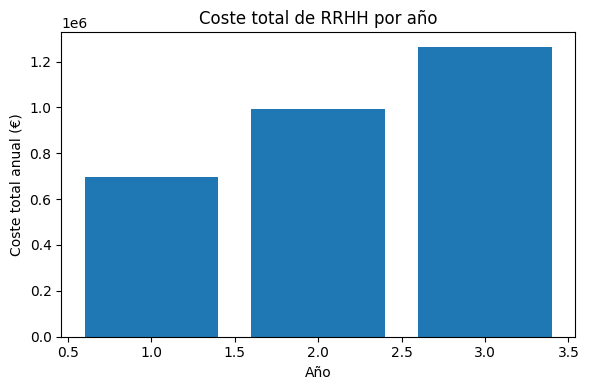

In [ ]:
# 2) GRÁFICA DE GASTO POR AÑO 

plt.figure(figsize=(6, 4))
plt.bar(df_totales["Año"], df_totales["Coste total anual (€)"])
plt.xlabel("Año")
plt.ylabel("Coste total anual (€)")
plt.title("Coste total de RRHH por año")
plt.tight_layout()
plt.show()


Perfil  Administración y Finanzas / RR.HH.  Dirección General  \
Año                                                             
1                                    35000              80000   
2                                    72000              82000   
3                                    74000              84000   

Perfil  Director/a de Operaciones  Jefes/as de Turno  Operarios/as de Línea  \
Año                                                                           
1                           65000              76000                 280000   
2                           67000             117000                 399000   
3                           69000             120000                 522000   

Perfil  Responsable Comercial B2B  Técnico/a de Calidad y Medioambiente  \
Año                                                                       
1                           55000                                 42000   
2                          112000                    

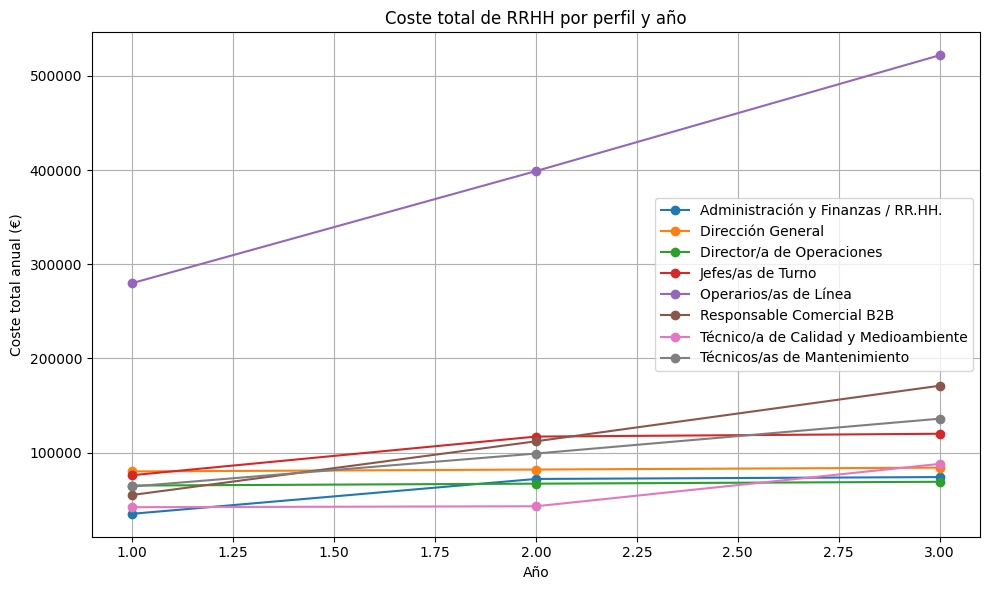

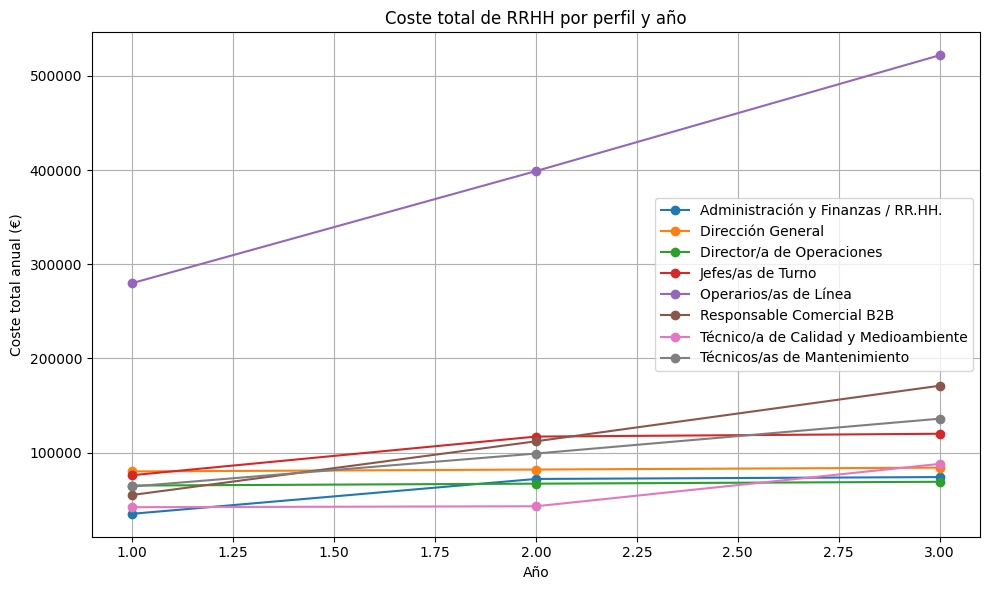

In [ ]:

import matplotlib.pyplot as plt

# Tabla: filas = Año, columnas = Perfil, valores = Coste total anual
tabla_lineas = (
    df_rrhh
    .groupby(["Año", "Perfil"])["Coste total anual (€)"]
    .sum()
    .unstack("Perfil")   # columnas = cada perfil
)

print(tabla_lineas)  # opcional: ver la tabla antes de graficar

# Gráfico de líneas: una línea por perfil a lo largo de los años
plt.figure(figsize=(10, 6))

for perfil in tabla_lineas.columns:
    plt.plot(
        tabla_lineas.index,
        tabla_lineas[perfil],
        marker="o",
        label=perfil
    )

plt.xlabel("Año")
plt.ylabel("Coste total anual (€)")
plt.title("Coste total de RRHH por perfil y año")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




El análisis del gasto de RRHH muestra una trayectoria claramente creciente: el coste total pasa de unos 697.000 € en el año 1 a 991.000 € en el año 2 y 1.264.000 € en el año 3, lo que refleja primero un fuerte salto asociado al ramp-up (≈+42 % del año 1 al 2) y luego un crecimiento más moderado pero aún importante en la fase de consolidación (≈+27 % del año 2 al 3). En los gráficos se aprecia que el peso dominante lo tienen los perfiles operativos, especialmente Operarios/as de Línea, que son la partida más alta y aumentan de forma continuada (280k → 399k → 522k), coherente con la ampliación de capacidad productiva; también destacan los incrementos de Responsable Comercial B2B (55k → 112k → 171k) y Técnicos/as de Mantenimiento (64k → 99k → 136k), lo que indica un refuerzo claro del área comercial y del soporte técnico para sostener una planta más exigente. Los perfiles directivos (Dirección General y Director/a de Operaciones) crecen suavemente, manteniendo una estructura estable, mientras que áreas de soporte como Administración y Finanzas / RR.HH. y Calidad y Medioambiente ganan peso a partir del año 2, alineado con la implantación de sistemas de gestión y el aumento de volumen. En conjunto, los gráficos muestran una evolución lógica: el incremento de masa salarial se concentra en los perfiles directamente ligados a la producción, mantenimiento y ventas, lo que refuerza la lectura de un proyecto que escala operaciones y mercado, asumiendo un mayor coste fijo de personal pero orientado a sostener mayores ingresos y capacidad operativa.

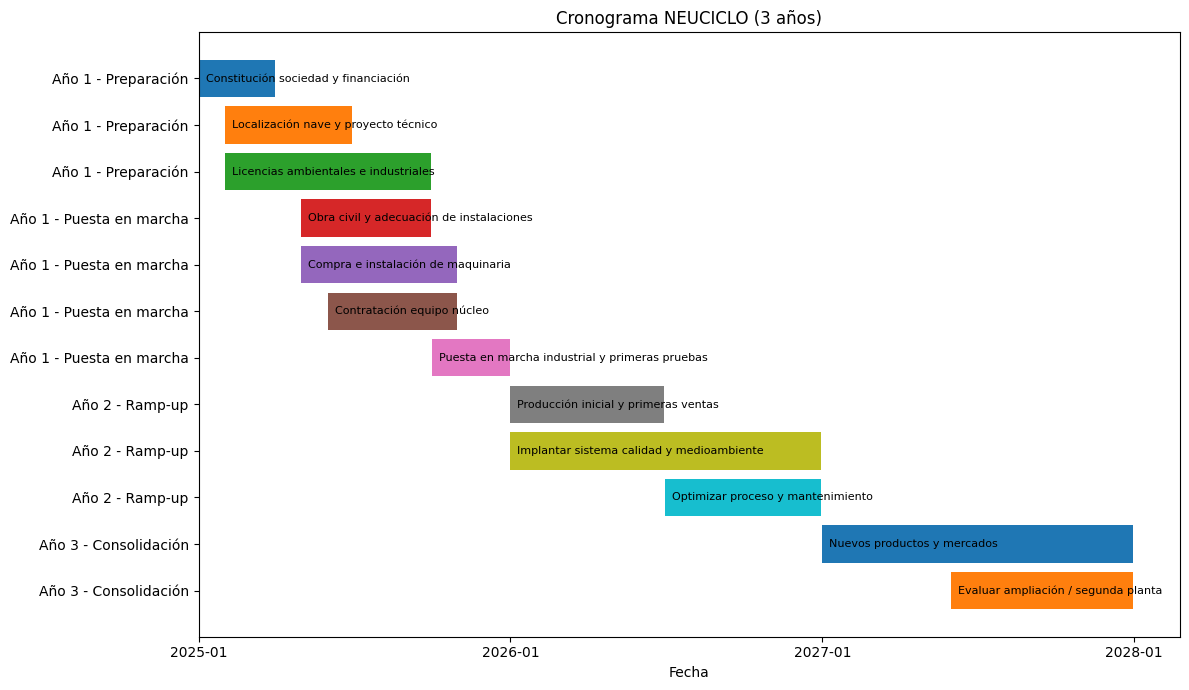

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

def cronograma_neuciclo():
    # Definimos tareas del plan de acción
    tareas = [
        {
            "Tarea": "Constitución sociedad y financiación",
            "Fase": "Año 1 - Preparación",
            "Inicio": "2025-01-01",
            "Fin":    "2025-03-31",
        },
        {
            "Tarea": "Localización nave y proyecto técnico",
            "Fase": "Año 1 - Preparación",
            "Inicio": "2025-02-01",
            "Fin":    "2025-06-30",
        },
        {
            "Tarea": "Licencias ambientales e industriales",
            "Fase": "Año 1 - Preparación",
            "Inicio": "2025-02-01",
            "Fin":    "2025-09-30",
        },
        {
            "Tarea": "Obra civil y adecuación de instalaciones",
            "Fase": "Año 1 - Puesta en marcha",
            "Inicio": "2025-05-01",
            "Fin":    "2025-09-30",
        },
        {
            "Tarea": "Compra e instalación de maquinaria",
            "Fase": "Año 1 - Puesta en marcha",
            "Inicio": "2025-05-01",
            "Fin":    "2025-10-31",
        },
        {
            "Tarea": "Contratación equipo núcleo",
            "Fase": "Año 1 - Puesta en marcha",
            "Inicio": "2025-06-01",
            "Fin":    "2025-10-31",
        },
        {
            "Tarea": "Puesta en marcha industrial y primeras pruebas",
            "Fase": "Año 1 - Puesta en marcha",
            "Inicio": "2025-10-01",
            "Fin":    "2025-12-31",
        },
        {
            "Tarea": "Producción inicial y primeras ventas",
            "Fase": "Año 2 - Ramp-up",
            "Inicio": "2026-01-01",
            "Fin":    "2026-06-30",
        },
        {
            "Tarea": "Implantar sistema calidad y medioambiente",
            "Fase": "Año 2 - Ramp-up",
            "Inicio": "2026-01-01",
            "Fin":    "2026-12-31",
        },
        {
            "Tarea": "Optimizar proceso y mantenimiento",
            "Fase": "Año 2 - Ramp-up",
            "Inicio": "2026-07-01",
            "Fin":    "2026-12-31",
        },
        {
            "Tarea": "Nuevos productos y mercados",
            "Fase": "Año 3 - Consolidación",
            "Inicio": "2027-01-01",
            "Fin":    "2027-12-31",
        },
        {
            "Tarea": "Evaluar ampliación / segunda planta",
            "Fase": "Año 3 - Consolidación",
            "Inicio": "2027-06-01",
            "Fin":    "2027-12-31",
        },
    ]

    df = pd.DataFrame(tareas)
    df["Inicio"] = pd.to_datetime(df["Inicio"])
    df["Fin"] = pd.to_datetime(df["Fin"])
    df["Duración"] = (df["Fin"] - df["Inicio"]).dt.days

    # Ordenamos tareas por fecha de inicio
    df = df.sort_values("Inicio").reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(12, 7))

    # Dibujar barras  Gantt
    for i, row in df.iterrows():
        ax.barh(
            y=i,
            width=row["Duración"],
            left=row["Inicio"],
        )
        # Etiqueta con el nombre de la tarea
        ax.text(
            row["Inicio"],
            i,
            "  " + row["Tarea"],
            va="center",
            ha="left",
            fontsize=8,
        )


    ax.set_yticks(range(len(df)))
    ax.set_yticklabels(df["Fase"])
    ax.invert_yaxis()  # para que la primera tarea quede arriba

    ax.xaxis_date()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

    ax.set_xlabel("Fecha")
    ax.set_title("Cronograma NEUCICLO (3 años)")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    cronograma_neuciclo()
